### Handling Matrix Data

In [1]:

#import library
from osgeo import gdal

#import constants
from gdalconst import *

# report exception usage
gdal.UseExceptions ()

# library of system-related functions
# sys: System-specific parameters and functions
import sys

try:
    # create dataset (filename) by opening file for reading (GA_ReadOnly)
    filename = "C:/Users/mac/Documents/Lake_Abaya_Chamo/LC08_169056_20181120/LC08_L1TP_169056_20181120_20181129_01_T1.tar/LC08_L1TP_169056_20181120_20181129_01_T1_B1_9.Stack.TIF"
    dataset = gdal.Open (filename, GA_ReadOnly)
except:
    print ("Error opening file!")

# raster operations
# ...

# close dataset and free memory
dataset = None

### Basic operations with multiple images
When working with more than one image (more than one file), it is important to ensure that the information for all images is compatible.

In [3]:
from osgeo import gdal
from gdalconst import *

# let's open 4 images to perform the NDVI tests from Landsat8 and the respective bands from Landsat05
filename_LC08_20181120_band_4= "C:/Users/mac/Documents/Lake_Abaya_Chamo/LC08_169056_20181120/LC08_L1TP_169056_20181120_20181129_01_T1.tar/LC08_L1TP_169056_20181120_20181129_01_T1_B4.TIF"
filename_LC08_20181120_band_5= "C:/Users/mac/Documents/Lake_Abaya_Chamo/LC08_169056_20181120/LC08_L1TP_169056_20181120_20181129_01_T1.tar/LC08_L1TP_169056_20181120_20181129_01_T1_B5.TIF"
filename_LT05_19841208_band_3= "C:/Users/mac/Documents/Lake_Abaya_Chamo/LT05_169056_19841208/LT05_L1TP_169056_19841208_20170219_01_T1.tar/LT05_L1TP_169056_19841208_20170219_01_T1_B3.TIF"
filename_LT05_19841208_band_4= "C:/Users/mac/Documents/Lake_Abaya_Chamo/LT05_169056_19841208/LT05_L1TP_169056_19841208_20170219_01_T1.tar/LT05_L1TP_169056_19841208_20170219_01_T1_B4.TIF"

#filename_crop_1_band_5 = "imagens/crop-1-band-5.tif"
#filename_crop_1_band_7 = "imagens/crop-1-band-7.tif"
#filename_crop_2_band_5 = "imagens/crop-2-band-5.tif"
#filename_crop_2_band_7 = "imagens/crop-2-band-7.tif"

try:
    dataset_LC08_20181120_band_4 = gdal.Open(filename_LC08_20181120_band_4, GA_ReadOnly) 
    print (dataset_LC08_20181120_band_4.GetGeoTransform())

    dataset_LC08_20181120_band_5 = gdal.Open(filename_LC08_20181120_band_5, GA_ReadOnly) 
    print (dataset_LC08_20181120_band_5.GetGeoTransform())

    dataset_LT05_19841208_band_3 = gdal.Open(filename_LT05_19841208_band_3, GA_ReadOnly) 
    print (dataset_LT05_19841208_band_3.GetGeoTransform())

    dataset_LT05_19841208_band_4 = gdal.Open(filename_LT05_19841208_band_4, GA_ReadOnly) 
    print (dataset_LT05_19841208_band_4.GetGeoTransform())
except:
    print ("Error opening a file!")

(173085.0, 30.0, 0.0, 756015.0, 0.0, -30.0)
(173085.0, 30.0, 0.0, 756015.0, 0.0, -30.0)
(176985.0, 30.0, 0.0, 743415.0, 0.0, -30.0)
(176985.0, 30.0, 0.0, 743415.0, 0.0, -30.0)


In [4]:
# check if crops are from the same region or not
print (dataset_LC08_20181120_band_4.GetGeoTransform () == dataset_LC08_20181120_band_5.GetGeoTransform ())
print (dataset_LT05_19841208_band_3.GetGeoTransform () == dataset_LT05_19841208_band_4.GetGeoTransform ())
print (dataset_LC08_20181120_band_4.GetGeoTransform () == dataset_LT05_19841208_band_4.GetGeoTransform ())

# check if the coordinate systems are the same
print (dataset_LC08_20181120_band_4.GetProjectionRef () == dataset_LT05_19841208_band_3.GetProjectionRef ())

True
True
False
True


In [5]:
#Show the amount of bands of each image
print (dataset_LC08_20181120_band_4.RasterCount)
print (dataset_LC08_20181120_band_5.RasterCount)
print (dataset_LT05_19841208_band_3.RasterCount)
print (dataset_LT05_19841208_band_4.RasterCount)

1
1
1
1


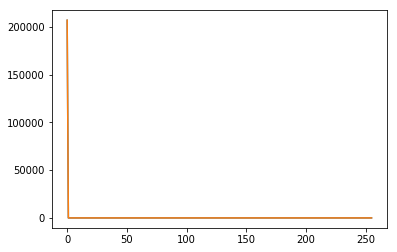

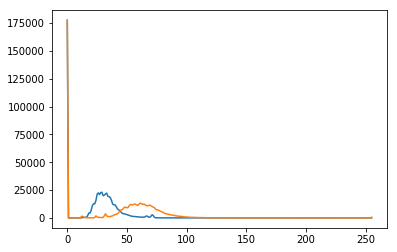

In [10]:
import matplotlib.pyplot as plt

# all images have a band each
LC08_20181120_band_4 = dataset_LC08_20181120_band_4.GetRasterBand(1)
LC08_20181120_band_5 = dataset_LC08_20181120_band_5.GetRasterBand(1)
LT05_19841208_band_3 = dataset_LT05_19841208_band_3.GetRasterBand(1)
LT05_19841208_band_4 = dataset_LT05_19841208_band_4.GetRasterBand(1)

# check some band properties, such as the histogram
plt.plot(LC08_20181120_band_4.GetHistogram())
plt.plot(LC08_20181120_band_5.GetHistogram())
plt.show()
plt.plot(LT05_19841208_band_3.GetHistogram())
plt.plot(LT05_19841208_band_4.GetHistogram())
plt.show()

In [11]:
# to perform band calculations, we use the numpy matrix conversion
numpy_LC08_20181120_band_4 = LC08_20181120_band_4.ReadAsArray()
numpy_LC08_20181120_band_5 = LC08_20181120_band_5.ReadAsArray()
numpy_LT05_19841208_band_3 = LT05_19841208_band_3.ReadAsArray()
numpy_LT05_19841208_band_4 = LT05_19841208_band_3.ReadAsArray()

print (numpy_LC08_20181120_band_4.shape)
print (numpy_LC08_20181120_band_5.shape)
print (numpy_LT05_19841208_band_3.shape)
print (numpy_LT05_19841208_band_4.shape)

(7771, 7611)
(7771, 7611)
(6981, 7531)
(6981, 7531)


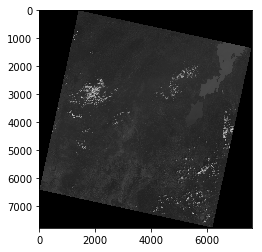

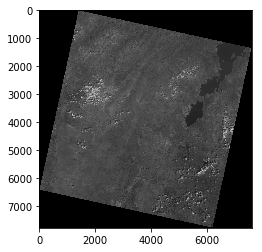

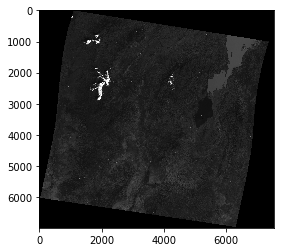

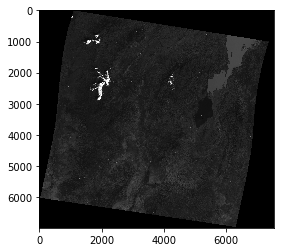

In [12]:
# to view bands as images
plt.imshow(numpy_LC08_20181120_band_4, cmap='gray')
plt.show()
plt.imshow(numpy_LC08_20181120_band_5, cmap='gray')
plt.show()
plt.imshow(numpy_LT05_19841208_band_3, cmap='gray')
plt.show()
plt.imshow(numpy_LT05_19841208_band_4, cmap='gray')
plt.show()

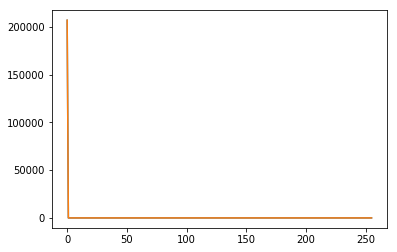

In [15]:
import matplotlib.pyplot as plt

# all images have a band each
LC08_20181120_band_4 = dataset_LC08_20181120_band_4.GetRasterBand(1)
LC08_20181120_band_5 = dataset_LC08_20181120_band_5.GetRasterBand(1)
# check some band properties, such as the histogram
plt.plot(LC08_20181120_band_4.GetHistogram())
plt.plot(LC08_20181120_band_5.GetHistogram())
plt.show()